In [1]:
%matplotlib inline

In [2]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [3]:
%%time 
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X


CPU times: user 2.68 s, sys: 66.5 ms, total: 2.74 s
Wall time: 1.47 s


dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [4]:
%%time
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

CPU times: user 15.8 s, sys: 8.52 s, total: 24.3 s
Wall time: 7.42 s


KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=2,
       max_iter=300, n_clusters=3, n_jobs=1, oversampling_factor=10,
       precompute_distances='auto', random_state=None, tol=0.0001)

CPU times: user 1.07 s, sys: 779 ms, total: 1.85 s
Wall time: 517 ms


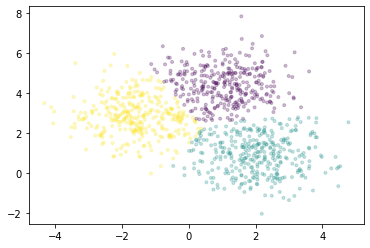

In [5]:
%%time
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);